In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn 

## Problem 1

In [3]:
# 1a
teams    = pd.read_csv('lahman_csv_2014-02-14\Teams.csv')	
players  = pd.read_csv('lahman_csv_2014-02-14\Batting.csv')	
salaries = pd.read_csv('lahman_csv_2014-02-14\Salaries.csv')
fielding = pd.read_csv('lahman_csv_2014-02-14\Fielding.csv')
master   = pd.read_csv('lahman_csv_2014-02-14\Master.csv')

In [4]:
# 1b
medianSalaries = salaries.groupby('playerID').median().drop(columns = ['yearID'])
namesdf = master.set_index('playerID')[['nameFirst', 'nameLast']]
medianSalaries = medianSalaries.join(namesdf).reset_index()
medianSalaries.head()

,playerID,salary,nameFirst,nameLast
0,aardsda01,419000.0,David,Aardsma
1,aasedo01,612500.0,Don,Aase
2,abadan01,327000.0,Andy,Abad
3,abadfe01,451500.0,Fernando,Abad
4,abbotje01,255000.0,Jeff,Abbott


In [5]:
# 1c
subteam = teams[(teams.G == 162) & (teams.yearID >= 1947)]
subteam = subteam[['yearID', 'teamID', 'W', 'AB', 'H', '2B', '3B', 'HR', 'BB']]
subteam['1B'] = subteam.H - subteam['2B'] - subteam['3B'] - subteam.HR
subteam['PA'] = subteam.AB + subteam.BB
stats = subteam[['teamID', 'yearID', 'W']].copy()
for col in ['1B', '2B', '3B', 'HR', 'BB']:
    stats[col] = subteam[col]/subteam.PA
stats

,teamID,yearID,W,1B,2B,3B,HR,BB
1366,LAA,1961,70,0.147748,0.035708,0.003604,0.030958,0.111548
1367,KC1,1961,61,0.164751,0.035982,0.007829,0.014993,0.096618
1377,NYA,1962,96,0.167148,0.038536,0.004656,0.031952,0.093770
1379,LAA,1962,86,0.159482,0.038027,0.005737,0.022455,0.098672
1381,CHA,1962,85,0.165797,0.040756,0.009129,0.014998,0.101076
...,...,...,...,...,...,...,...,...
2740,LAN,2013,92,0.169432,0.047092,0.002849,0.023127,0.079772
2741,ARI,2013,81,0.162228,0.048749,0.005004,0.020985,0.083777
2742,SDN,2013,76,0.155582,0.041110,0.004345,0.024398,0.078041
2743,SFN,2013,76,0.170071,0.046504,0.005813,0.017771,0.077894


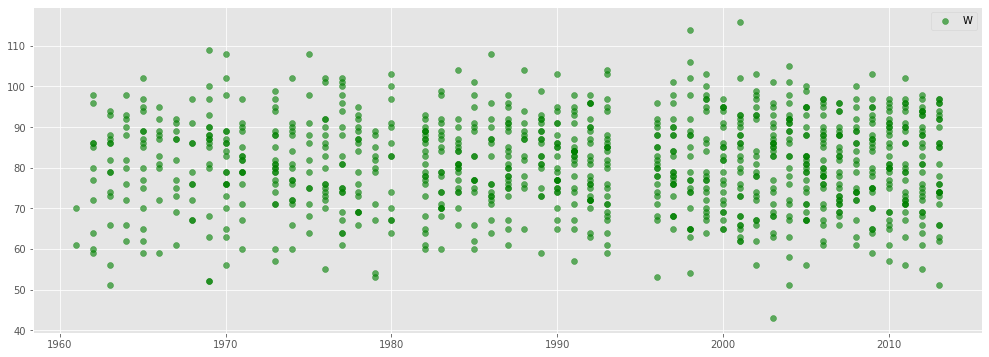

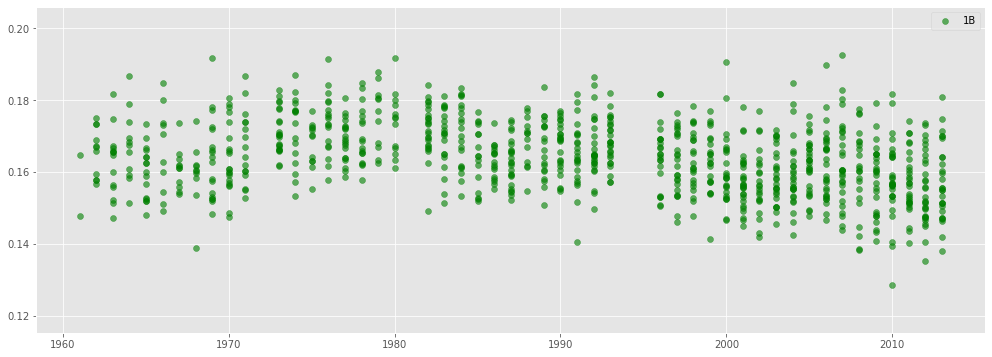

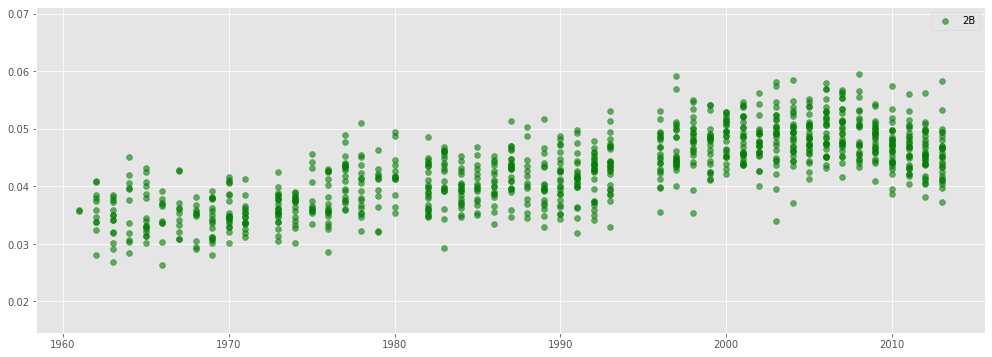

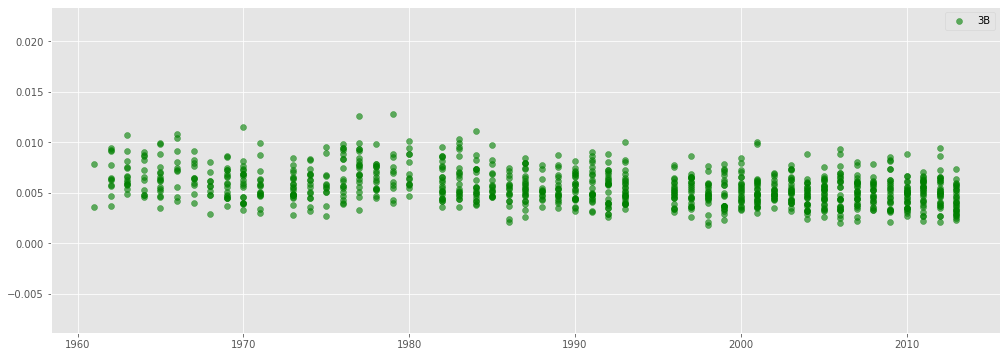

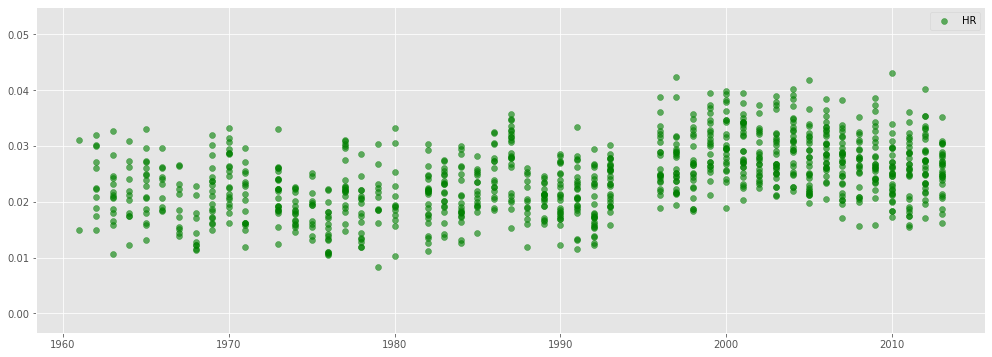

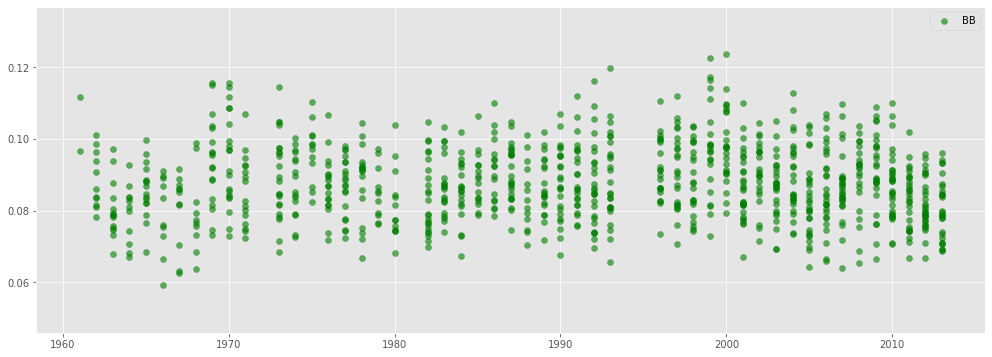

In [6]:
plt.style.use('ggplot')
for col in stats.columns[2:]:
    plt.figure(figsize = (17, 6))
    plt.scatter(stats.yearID, 
                stats[col],
                alpha = 0.6, 
                color = 'g')
    plt.legend([col])
    plt.show()

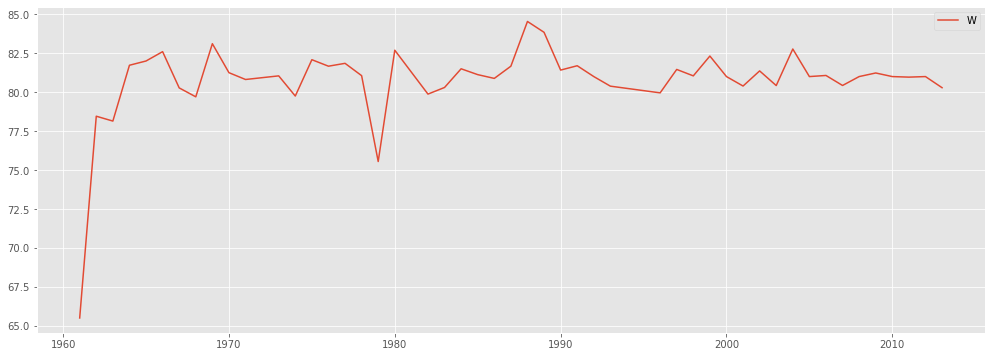

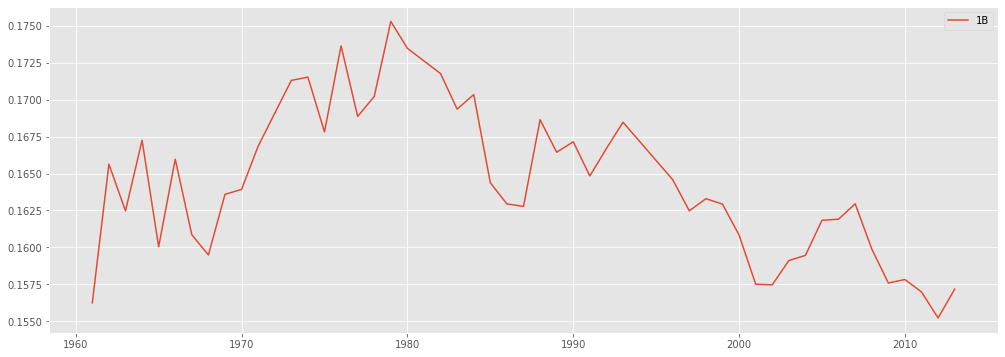

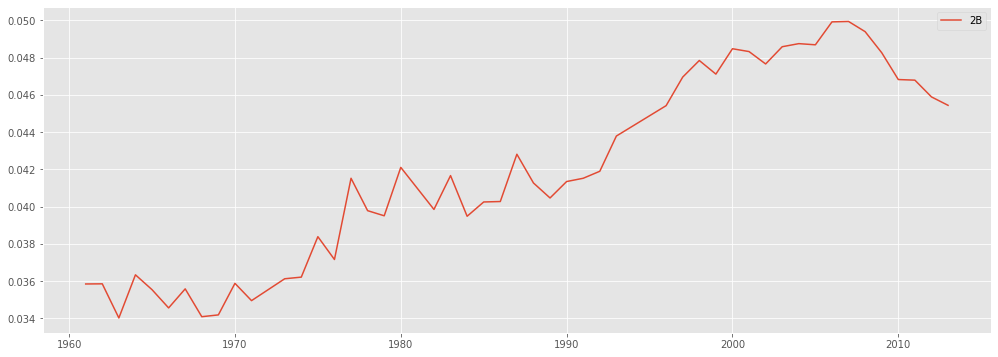

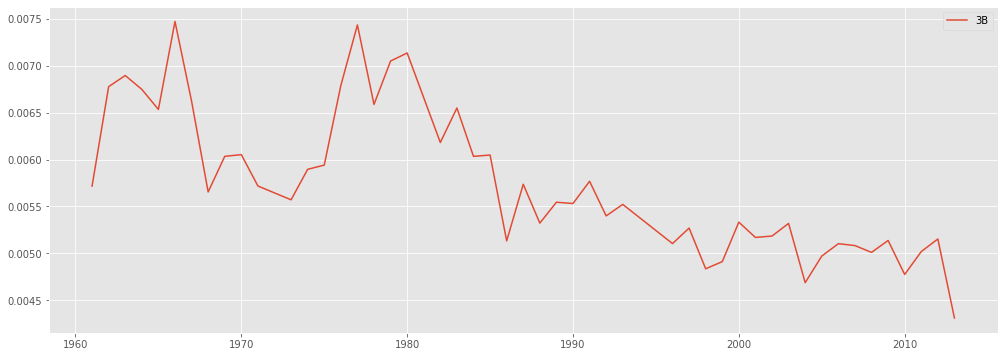

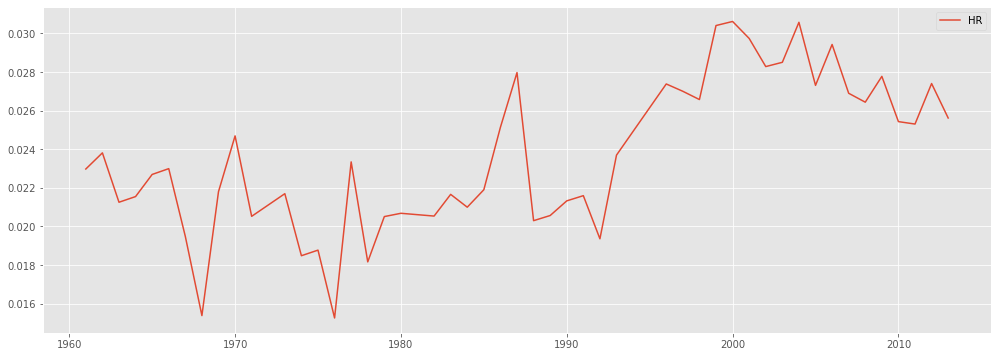

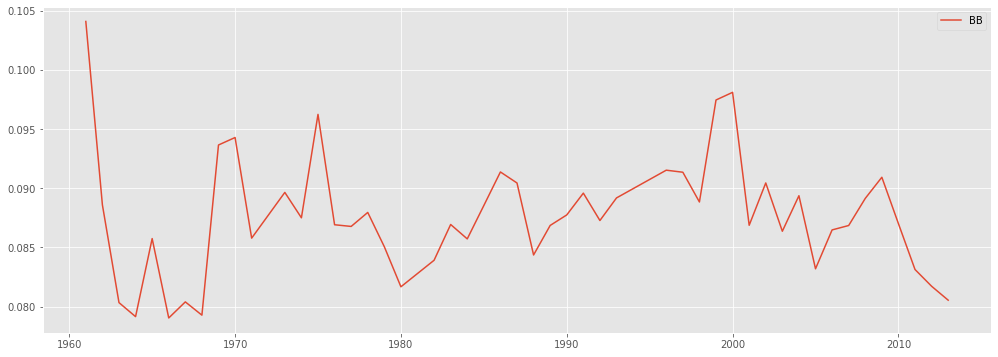

In [7]:
yearstats = stats.groupby('yearID').mean()
for col in stats.columns[2:]:
    plt.figure(figsize = (17, 6))
    plt.plot(yearstats.index, 
                yearstats[col])
    plt.legend([col])
    plt.show()

In [8]:
# 1e
column = ['1B', '2B', '3B', 'HR', 'BB']
def norm(df):
    df[column] -= df[column].mean()
    return df
stats = stats.groupby('yearID').apply(norm)

In [9]:
# 1f
from sklearn import linear_model
total_parameter_columns = ['1B', '2B', '3B', 'HR', 'BB']
test_data = stats[stats.yearID>2002]
train_data = stats[stats.yearID<=2002]
def asr(p, a):
    return float(((p - a)**2).mean())

val_dict = {}
for i in range(1, 32):
    s = bin(i)[2:].zfill(5)
    parameter_columns = [total_parameter_columns[j] for j, b in enumerate(s) if b=='1']
            
    lin_model = linear_model.LinearRegression()
    lin_model.fit(train_data[parameter_columns], train_data[['W']])
    predictions = lin_model.predict(test_data[parameter_columns])
    #print (asr(predictions, test_data[['W']]), '\t', parameter_columns,)
    val_dict[asr(predictions, test_data[['W']])] = lin_model
team_model = val_dict[min(val_dict)]

In [10]:
print (min(val_dict), team_model.coef_)

82.6337882958576 [[ 538.37883582  507.62026233 1092.62031362  853.64597863  513.99336348]]


In [11]:
# 1g
subplayer = players[players.AB + players.BB >= 500][players.yearID>1947]#[players.G == 162]
subplayer['1B'] = subplayer.H - subplayer['2B'] - subplayer['3B'] - subplayer.HR
subplayer['PA'] = subplayer.AB + subplayer.BB
playerstats = subplayer[['playerID', 'yearID']].copy()
for col in ['1B', '2B', '3B', 'HR', 'BB']:
    playerstats[col] = subplayer[col]/subplayer.PA
playerstats

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,playerID,yearID,1B,2B,3B,HR,BB
8,aaronha01,1955,0.178187,0.056836,0.013825,0.041475,0.075269
9,aaronha01,1956,0.195046,0.052632,0.021672,0.040248,0.057276
10,aaronha01,1957,0.180060,0.040179,0.008929,0.065476,0.084821
11,aaronha01,1958,0.193939,0.051515,0.006061,0.045455,0.089394
12,aaronha01,1959,0.192647,0.067647,0.010294,0.057353,0.075000
...,...,...,...,...,...,...,...
97847,werthja01,2013,0.187739,0.045977,0.000000,0.047893,0.114943
97851,wietema01,2013,0.127208,0.051237,0.000000,0.038869,0.075972
97880,youngmi02,2013,0.182353,0.047059,0.007843,0.015686,0.082353
97885,zimmery01,2013,0.162420,0.041401,0.003185,0.041401,0.095541


In [12]:
playerstats = playerstats.groupby('yearID').apply(norm)
playerstats

,playerID,yearID,1B,2B,3B,HR,BB
8,aaronha01,1955,0.001060,0.018570,0.005585,0.011337,-0.027249
9,aaronha01,1956,0.021581,0.013895,0.012578,0.009438,-0.044519
10,aaronha01,1957,0.005503,-0.002189,0.000537,0.036908,-0.012659
11,aaronha01,1958,0.018367,0.011015,-0.002219,0.015398,-0.007762
12,aaronha01,1959,0.016261,0.025762,0.002743,0.028368,-0.022898
...,...,...,...,...,...,...,...
97847,werthja01,2013,0.021218,-0.003367,-0.004694,0.018426,0.028857
97851,wietema01,2013,-0.039313,0.001892,-0.004694,0.009402,-0.010113
97880,youngmi02,2013,0.015831,-0.002286,0.003149,-0.013781,-0.003732
97885,zimmery01,2013,-0.004101,-0.007943,-0.001509,0.011934,0.009456


In [13]:
# 1h
def meanplayer(df):
    return df[['playerID', '1B', '2B', '3B', 'HR', 'BB']].mean()
playerLS = playerstats.groupby('playerID').apply(meanplayer).reset_index()
playerLS = playerLS.merge(master[['playerID', 'debut', 'finalGame']], on = 'playerID')
playerLS['debut'] = playerLS.debut.apply(lambda x: int(x[0:4]))
playerLS['finalGame'] = playerLS.finalGame.apply(lambda x: int(x[0:4]))
playerLS = playerLS.rename(columns = {'debut':'minYear', 'finalGame':'maxYear'})
playerLS

,playerID,1B,2B,3B,HR,BB,minYear,maxYear
0,aaronha01,-0.007039,0.006542,-0.000249,0.027814,0.009415,1954,1976
1,abramca01,0.013463,-0.023915,0.002384,0.003842,0.019455,1949,1956
2,abreubo01,-0.008230,0.006438,0.000983,-0.003154,0.050532,1996,2012
3,ackledu01,-0.009186,-0.016607,-0.002044,-0.015187,0.001574,2011,2013
4,adairje01,0.012235,0.003353,-0.002105,-0.013016,-0.037399,1958,1970
...,...,...,...,...,...,...,...,...
1532,zernigu01,-0.020857,-0.008680,-0.003715,0.029474,-0.012651,1949,1959
1533,zimmedo01,-0.017461,0.009122,-0.000421,-0.005708,-0.050435,1954,1965
1534,zimmery01,-0.006366,0.004768,-0.001699,0.006928,0.005074,2005,2013
1535,ziskri01,-0.004883,0.001124,-0.003160,0.013099,0.007169,1971,1983


In [14]:
# 1i
playerLS['OPW'] = team_model.predict(playerLS[total_parameter_columns])
playerLS

,playerID,1B,2B,3B,HR,BB,minYear,maxYear,OPW
0,aaronha01,-0.007039,0.006542,-0.000249,0.027814,0.009415,1954,1976,108.914977
1,abramca01,0.013463,-0.023915,0.002384,0.003842,0.019455,1949,1956,92.065995
2,abreubo01,-0.008230,0.006438,0.000983,-0.003154,0.050532,1996,2012,104.265305
3,ackledu01,-0.009186,-0.016607,-0.002044,-0.015187,0.001574,2011,2013,53.309528
4,adairje01,0.012235,0.003353,-0.002105,-0.013016,-0.037399,1958,1970,56.728657
...,...,...,...,...,...,...,...,...,...
1532,zernigu01,-0.020857,-0.008680,-0.003715,0.029474,-0.012651,1949,1959,80.037316
1533,zimmedo01,-0.017461,0.009122,-0.000421,-0.005708,-0.050435,1954,1965,45.047082
1534,zimmery01,-0.006366,0.004768,-0.001699,0.006928,0.005074,2005,2013,86.732329
1535,ziskri01,-0.004883,0.001124,-0.003160,0.013099,0.007169,1971,1983,90.429643


In [15]:
from collections import defaultdict
def pos(df):
    posn = df.POS
    D = defaultdict(int)
    for p in posn:
        D[p]+=1
    return max(D, key = lambda x: D[x])
posdf = fielding.groupby('playerID').apply(pos).reset_index()
posdf = posdf.rename(columns = {0:'POS'})
playerLS = playerLS.merge(posdf, on = 'playerID').merge(medianSalaries, on = 'playerID')
playerLS

,playerID,1B,2B,3B,HR,BB,minYear,maxYear,OPW,POS,salary,nameFirst,nameLast
0,abreubo01,-0.008230,0.006438,0.000983,-0.003154,0.050532,1996,2012,104.265305,RF,9000000.0,Bobby,Abreu
1,ackledu01,-0.009186,-0.016607,-0.002044,-0.015187,0.001574,2011,2013,53.309528,1B,2400000.0,Dustin,Ackley
2,adamsru01,-0.007867,-0.001289,0.004160,-0.017533,0.002672,2004,2009,67.134620,SS,329500.0,Russ,Adams
3,alfoned01,0.013541,-0.002185,-0.003255,-0.006373,0.010738,1995,2006,83.776331,2B,4112500.0,Edgardo,Alfonzo
4,alicelu01,0.035625,-0.009597,0.007988,-0.026156,-0.006580,1988,2002,78.398836,2B,750000.0,Luis,Alicea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,zaungr01,-0.008357,-0.016634,-0.003284,-0.010903,0.052494,1995,2010,82.216486,C,1000000.0,Gregg,Zaun
972,zeileto01,-0.007849,-0.002010,-0.002854,-0.002622,0.016118,1989,2004,78.755063,3B,2700000.0,Todd,Zeile
973,zimmery01,-0.006366,0.004768,-0.001699,0.006928,0.005074,2005,2013,86.732329,3B,6350000.0,Ryan,Zimmerman
974,ziskri01,-0.004883,0.001124,-0.003160,0.013099,0.007169,1971,1983,90.429643,LF,272500.0,Richie,Zisk


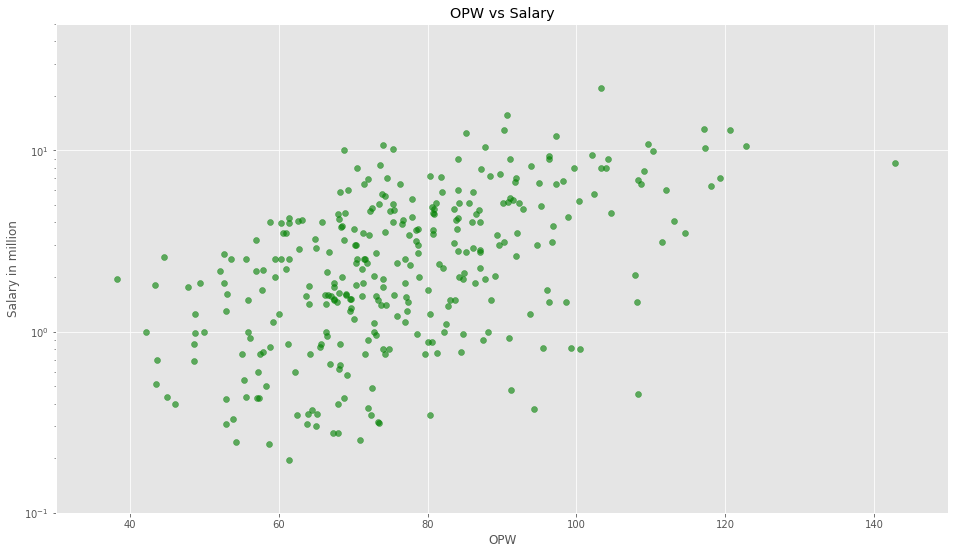

In [16]:
active_players = playerLS[(playerLS.minYear<=2002) &
                         (playerLS.maxYear>=2003) &
                         (playerLS.maxYear-playerLS.minYear>=3)]

def showsalopw(df):
    plt.figure(figsize = (16, 9))
    plt.yscale('log')
    plt.scatter(df.OPW, 
                df.salary/10**6,
                alpha = 0.6, 
                color = 'g')
    plt.xlim(30, 150)
    plt.ylim(.1, 50)
    plt.xlabel('OPW')
    plt.ylabel('Salary in million')
    plt.title('OPW vs Salary')
    plt.show()
showsalopw(active_players)

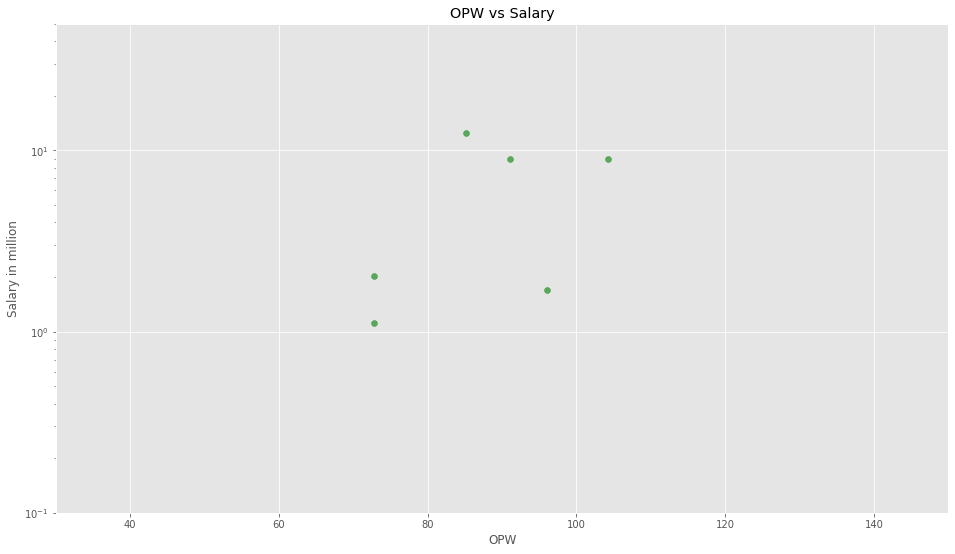

RF


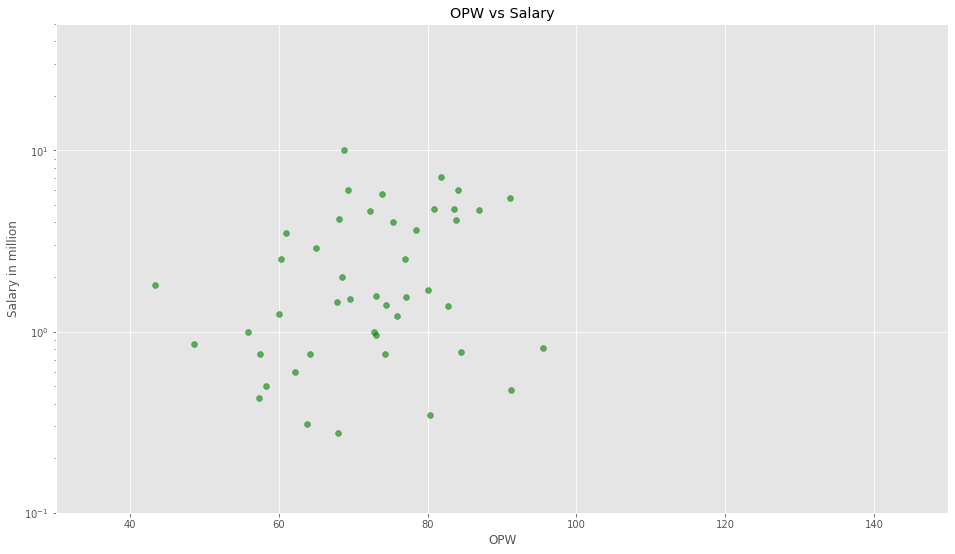

2B


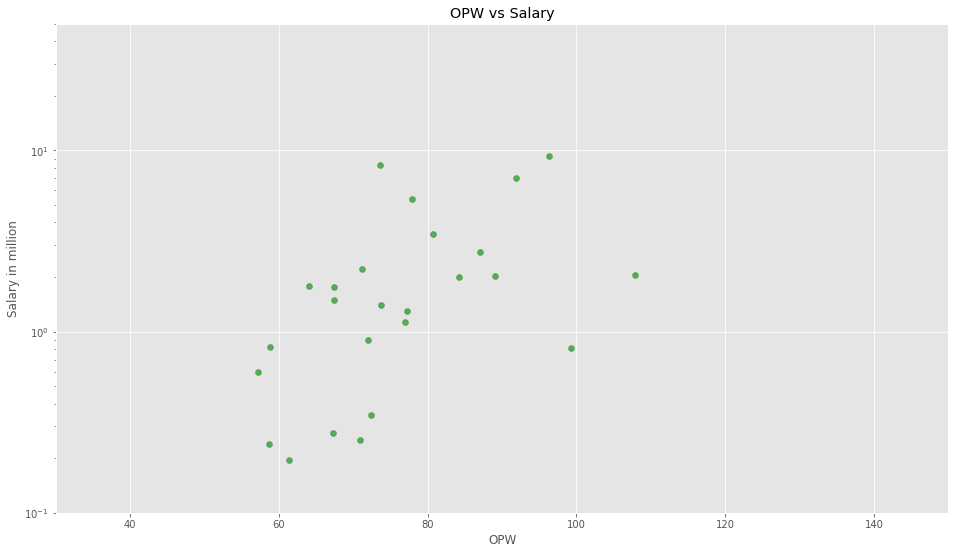

LF


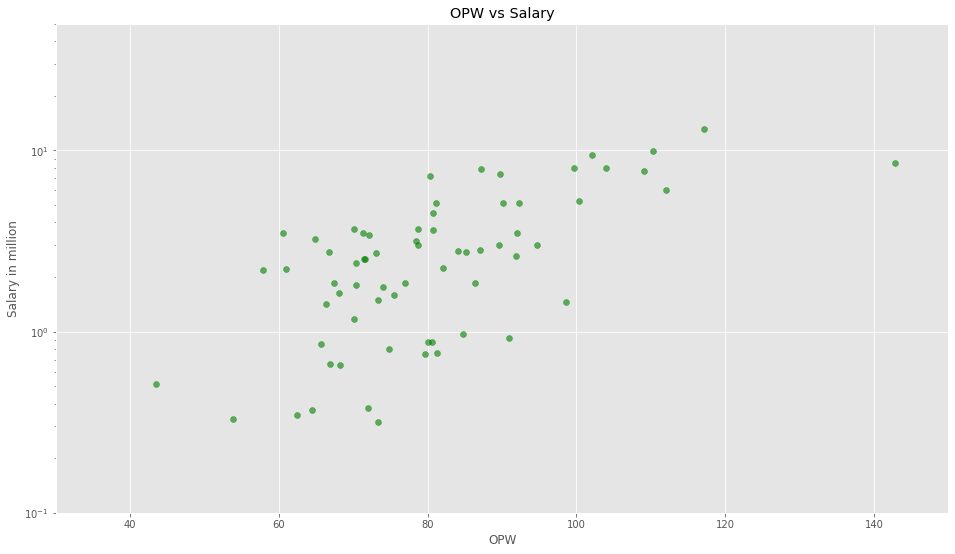

OF


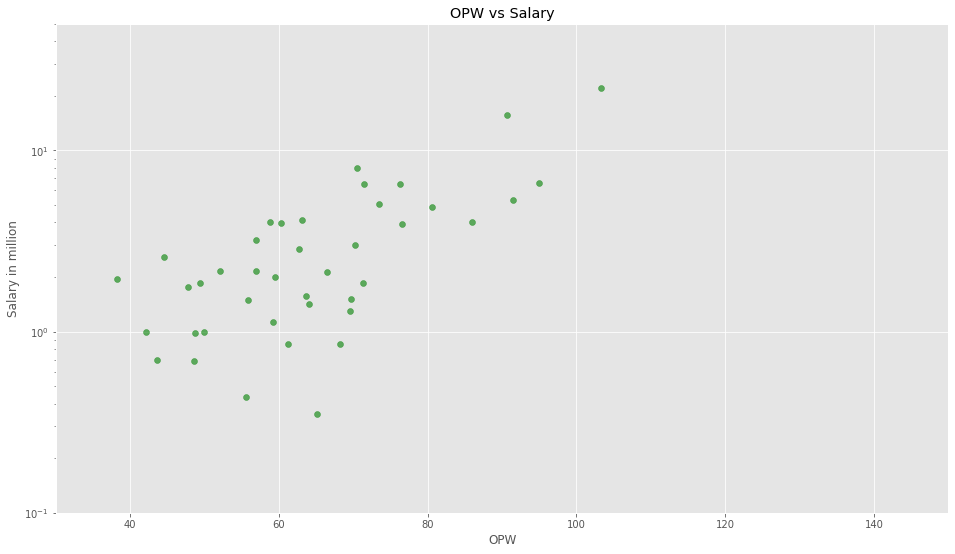

SS


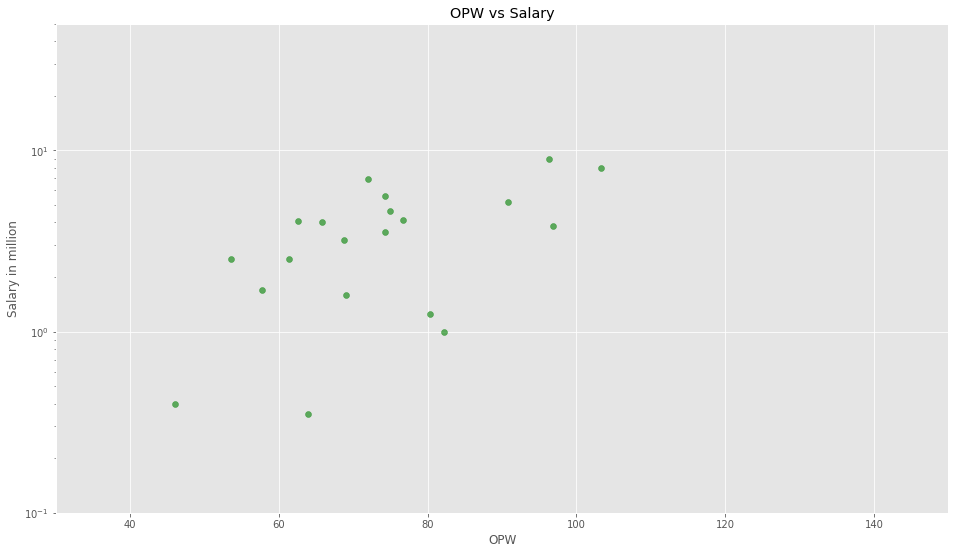

C


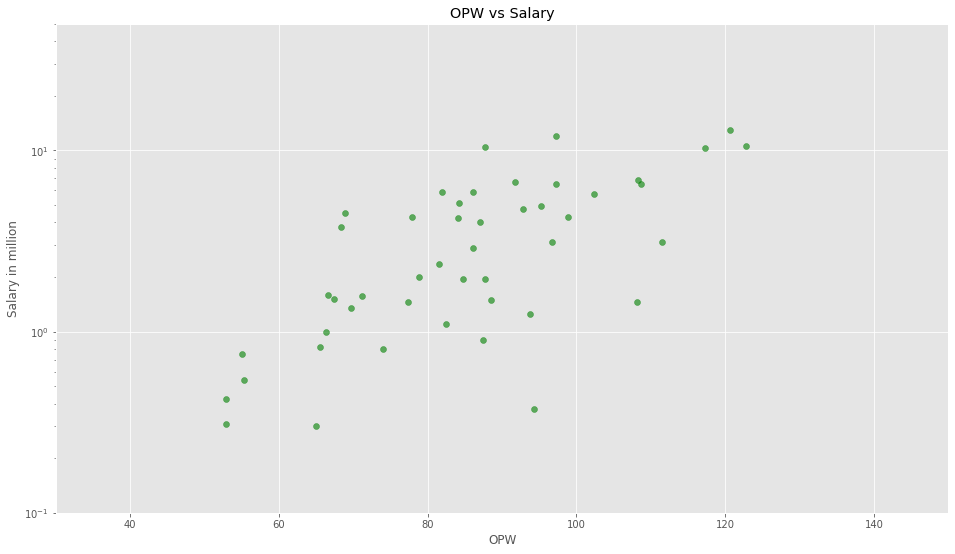

1B


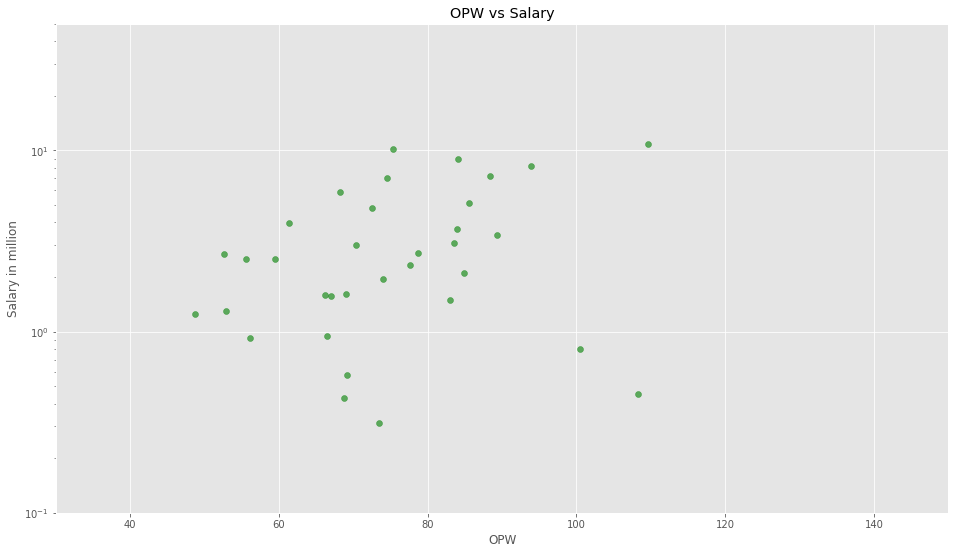

3B


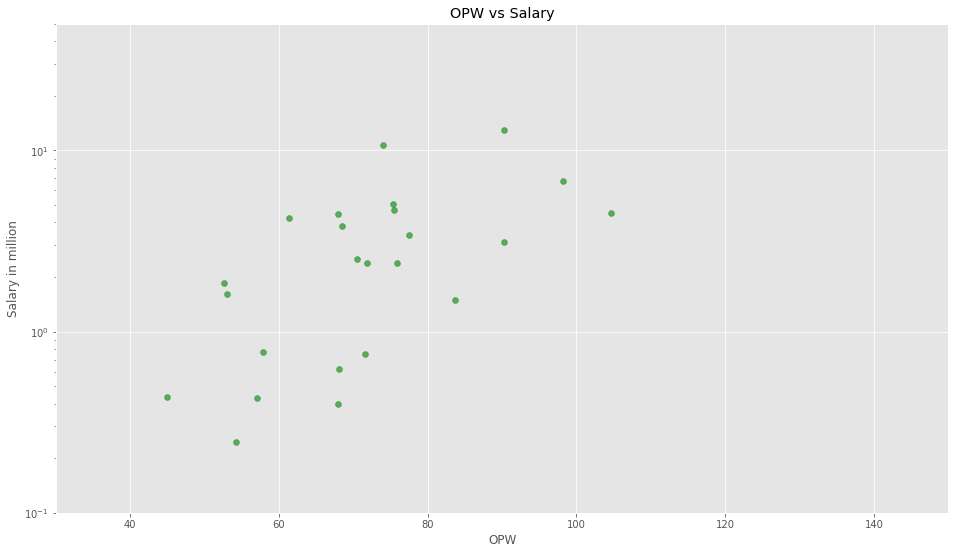

CF


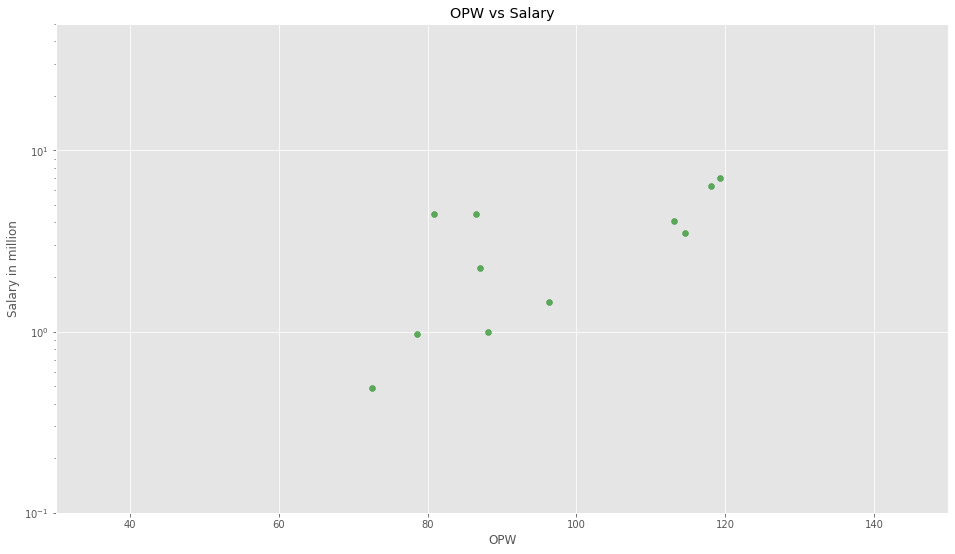

DH


In [17]:
good_players = active_players[(active_players.OPW>80) & (active_players.salary<=4*10**6)]
for pos in active_players.POS.unique():
    showsalopw(active_players[active_players.POS == pos])
    print (pos)

In [18]:
dream_team = []
sal = 0
topw = 0
good_players['value'] = (good_players.OPW-85)/(good_players.salary)
toppicks = pd.DataFrame()
for pos in active_players.POS.unique():
    df = good_players[good_players.POS == pos]
    P = df[df.value == df.value.max()]
    sal+= int(P.salary)
    topw += int(P.OPW)
    dream_team.append(str(P.playerID))
    print (pos, float(P.salary/10**6), int(P.OPW))
    toppicks = toppicks.append(P)
print (sal, topw)

RF 1.7 96
2B 0.4775 91
LF 0.8125 99
OF 1.455 98
SS 4.0 85
C 3.825 96
1B 0.375 94
3B 0.45 108
CF 3.1 90
DH 3.5 114
19695000 971


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
print (toppicks.OPW.mean())
print (toppicks.salary.sum())
toppicks

97.53951594821216
19695000.0


,playerID,1B,2B,3B,HR,BB,minYear,maxYear,OPW,POS,salary,nameFirst,nameLast,value
927,werthja01,-0.015295,-0.000697,-0.003564,0.012380,0.032882,2002,2013,96.060268,RF,1700000.0,Jayson,Werth,6.506040e-06
55,bellhma01,-0.039016,0.002195,0.001311,0.005503,0.046596,1997,2007,91.262322,2B,477500.0,Mark,Bellhorn,1.311481e-05
237,delluda01,-0.050673,-0.018869,0.004528,0.024153,0.057238,1997,2009,99.199139,LF,812500.0,David,Dellucci,1.747586e-05
212,custja01,-0.049581,-0.020791,-0.004675,0.017336,0.087806,2001,2011,98.649220,OF,1455000.0,Jack,Cust,9.380907e-06
377,guillca01,0.005510,0.003117,0.006703,-0.008735,0.000904,1998,2011,85.953303,SS,4000000.0,Carlos,Guillen,2.383259e-07
443,hundlto01,-0.053698,-0.002839,-0.002554,0.029177,0.046759,1990,2003,96.872261,C,3825000.0,Todd,Hundley,3.103859e-06
260,durazer01,-0.001519,0.001571,-0.004507,0.001995,0.032018,1999,2005,94.287842,1B,375000.0,Erubiel,Durazo,2.476758e-05
275,ensbemo01,-0.033243,-0.003037,-0.000346,0.026321,0.047626,2000,2008,108.203917,3B,450000.0,Morgan,Ensberg,5.156426e-05
551,loftoke01,0.033718,-0.008805,0.007064,-0.018399,0.006790,1991,2007,90.259039,CF,3100000.0,Kenny,Lofton,1.696464e-06
585,martied01,0.000967,0.011742,-0.003917,0.004958,0.052803,1987,2004,114.647849,DH,3500000.0,Edgar,Martinez,8.470814e-06


In [20]:
dream_team

['927    werthja01\nName: playerID, dtype: object',
 '55    bellhma01\nName: playerID, dtype: object',
 '237    delluda01\nName: playerID, dtype: object',
 '212    custja01\nName: playerID, dtype: object',
 '377    guillca01\nName: playerID, dtype: object',
 '443    hundlto01\nName: playerID, dtype: object',
 '260    durazer01\nName: playerID, dtype: object',
 '275    ensbemo01\nName: playerID, dtype: object',
 '551    loftoke01\nName: playerID, dtype: object',
 '585    martied01\nName: playerID, dtype: object']

## Problem 2

In [142]:
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics

In [122]:
# 2a
iris = sklearn.datasets.load_iris()

X = iris.data
Y = iris.target

print (X.shape, Y.shape)

(150, 4) (150,)


In [123]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.33)
print (X_train.shape, Y_train.shape)
print (x_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


In [124]:
# 2b
svd = TruncatedSVD()
X_new = svd.fit_transform(X_train)
X_new.shape

(100, 2)

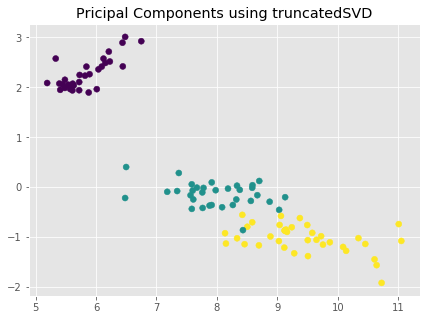

In [125]:
plt.figure(figsize = (7, 5))
plt.scatter(X_new[:,0], X_new[:,1], c = Y_train)
plt.title('Pricipal Components using truncatedSVD')
plt.show()

In [126]:
parameters = {'n_neighbors': tuple(range(1, 25))}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv = 10)
clf.fit(X_train, Y_train)
scores_df = pd.DataFrame(clf.cv_results_)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [209]:
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000943,3.398698e-04,0.001957,0.000359,1,{'n_neighbors': 1},1.0,1.0,1.0,1.0,0.9,0.9,1.0,1.0,1.0,1.0,0.98,0.040000,2
1,0.000798,3.991207e-04,0.001800,0.000401,2,{'n_neighbors': 2},1.0,1.0,1.0,1.0,0.9,0.9,1.0,1.0,1.0,1.0,0.98,0.040000,2
2,0.000898,5.370115e-04,0.002098,0.000691,3,{'n_neighbors': 3},1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0,1.0,0.99,0.030000,1
3,0.000897,2.993318e-04,0.001696,0.000458,4,{'n_neighbors': 4},1.0,1.0,1.0,1.0,0.9,0.9,0.9,1.0,1.0,1.0,0.97,0.045826,4
4,0.000900,3.002608e-04,0.001992,0.000438,5,{'n_neighbors': 5},0.9,1.0,1.0,1.0,0.9,1.0,0.9,1.0,1.0,1.0,0.97,0.045826,4
5,0.000893,2.978646e-04,0.001895,0.000301,6,{'n_neighbors': 6},1.0,1.0,1.0,1.0,0.9,0.9,0.9,1.0,1.0,1.0,0.97,0.045826,4
6,0.000902,3.006847e-04,0.001787,0.000396,7,{'n_neighbors': 7},0.9,1.0,1.0,1.0,0.9,1.0,0.9,1.0,1.0,1.0,0.97,0.045826,4
7,0.000901,3.004593e-04,0.002089,0.000527,8,{'n_neighbors': 8},0.9,1.0,1.0,1.0,0.9,1.0,0.9,1.0,1.0,1.0,0.97,0.045826,4
8,0.000701,4.592134e-04,0.001987,0.000447,9,{'n_neighbors': 9},0.9,1.0,1.0,1.0,0.9,1.0,0.9,1.0,1.0,1.0,0.97,0.045826,4
9,0.000904,3.017196e-04,0.001889,0.000296,10,{'n_neighbors': 10},0.9,1.0,1.0,1.0,0.9,1.0,0.9,1.0,1.0,1.0,0.97,0.045826,4


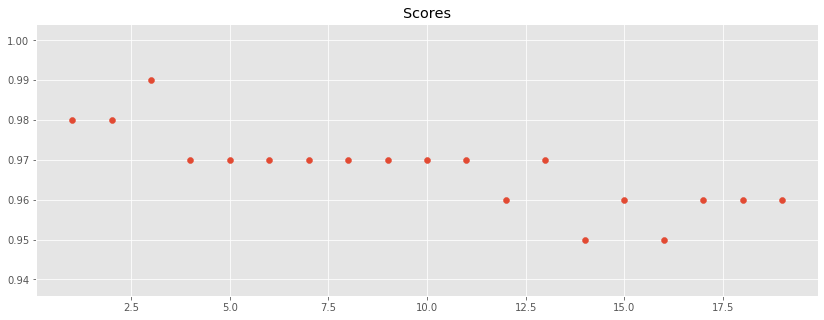

In [138]:
# 2d
plt.figure(figsize = (14, 5))
plt.scatter(scores_df.param_n_neighbors, 
            scores_df.mean_test_score,# c = Y_train
           )
plt.title('Scores')
plt.show()

In [218]:
plt.figure(figsize = (14, 5))
plt.boxplot([np.ndarray(scores_df[f'split{i}_test_score']).transpose() for i in range(10)])
plt.scatter(scores_df.param_n_neighbors, 
            scores_df.mean_test_score,# c = Y_train
           )
plt.show()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

<Figure size 1008x360 with 0 Axes>

In [129]:
clf.best_params_

{'n_neighbors': 3}

In [139]:
# 2e
clf.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [140]:
Predictions = knn.predict(x_test)
(y_test == Predictions).sum()/len(y_test)

0.96

## Problem 3

In [149]:
# 3a
digits = sklearn.datasets.load_digits()
X = digits.data
Y = digits.target

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.33)
print (X.shape, Y.shape)
print (X_train.shape, Y_train.shape)
print (x_test.shape, y_test.shape)

(1797, 64) (1797,)
(1203, 64) (1203,)
(594, 64) (594,)


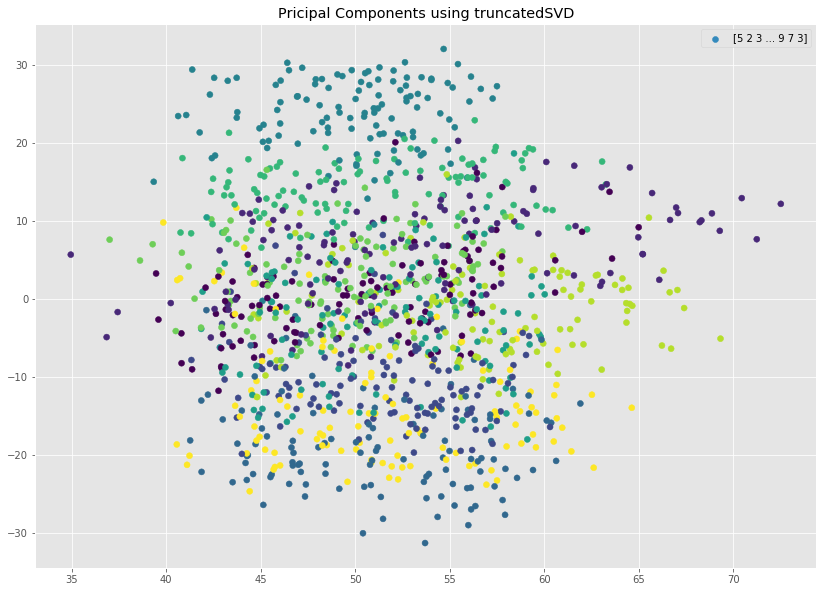

In [201]:
# 3b
svd = TruncatedSVD()
X_new = svd.fit_transform(X_train)
plt.figure(figsize = (14, 10))
plt.scatter(X_new[:,0], X_new[:,1], c = Y_train, label = Y_train)
plt.title('Pricipal Components using truncatedSVD')
plt.legend()
plt.show()

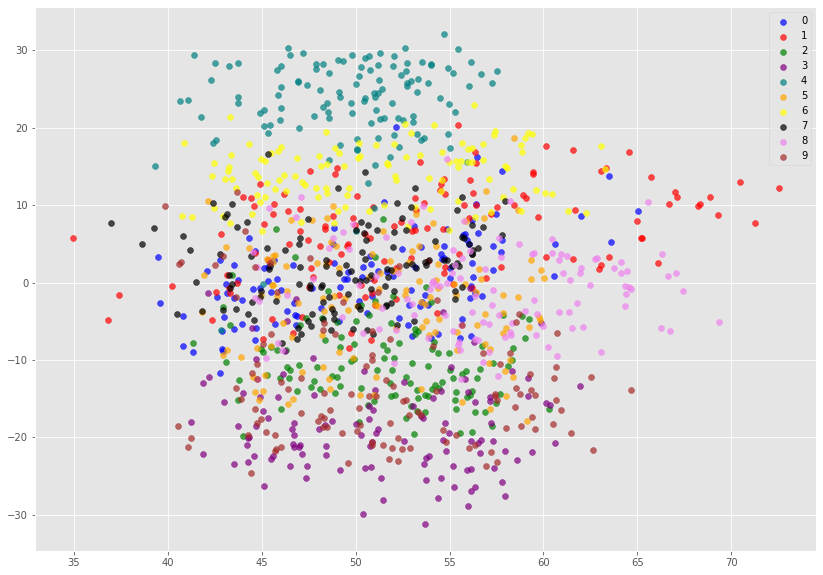

In [199]:
color = ['blue', 'red', 'green', 'purple', 'teal', 'orange', 'yellow', 'black', 'violet', 'brown']
plt.figure(figsize = (14, 10))
scatter_x = X_new[:,0]
scatter_y = X_new[:,1]
group = Y_train
for g in np.unique(group):
    i = np.where(group == g)
    plt.scatter(scatter_x[i], scatter_y[i], label=g,  color = color[g], alpha = 0.7)
plt.legend()
plt.show()

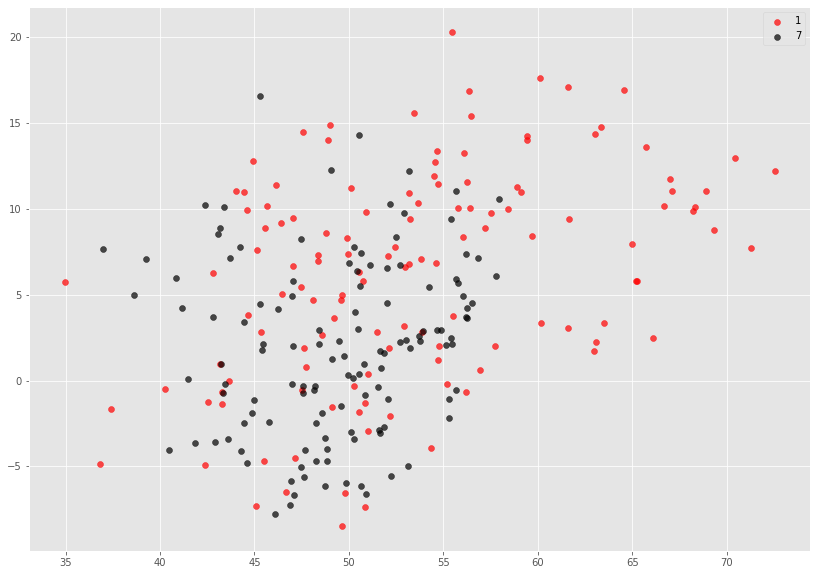

In [203]:
plt.figure(figsize = (14, 10))
scatter_x = X_new[:,0]
scatter_y = X_new[:,1]
group = Y_train
for g in np.unique(group):
    if g in [1, 7]:
        i = np.where(group == g)
        plt.scatter(scatter_x[i], scatter_y[i], label=g,  color = color[g], alpha = 0.7)
plt.legend()
plt.show()

In [205]:
parameters = {'n_neighbors': tuple(range(1, 32))}
K_Best = {}
for dim in range(1, 11):
    svd = TruncatedSVD(n_components=dim)
    Trun_X = svd.fit_transform(X_train)
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, parameters, cv = 10)
    clf.fit(Trun_X, Y_train)
    best_k = clf.best_params_['n_neighbors']
    K_Best[dim] = best_k

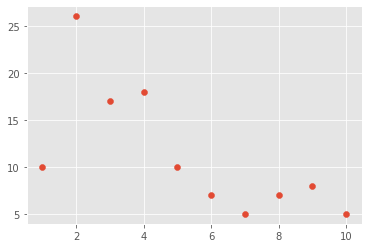

In [208]:
plt.scatter(K_Best.keys(), K_Best.values())